In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ocr import *
from solver_sudoku import *
from keras.models import load_model
from keras.models import model_from_json

print("import success")

import success


# 🎯 AI Sudoku Solver
## Computer Vision & Deep Learning Project

### Overview
This project uses:
- 🖼️ Computer Vision (OpenCV)
- 🧠 Deep Learning (TensorFlow/Keras) 
- 🔢 Image Processing
- ⚡ Real-time Sudoku grid detection and solving

### Current File
Processing image: `test/test2.webp` for Sudoku grid analysis

In [8]:
# Load image
img_path = "/Users/kcsam/Desktop/github/AI-Sudoku/test/test2.webp" # Change this to the path of the image you want to test
img = cv2.imread(img_path)


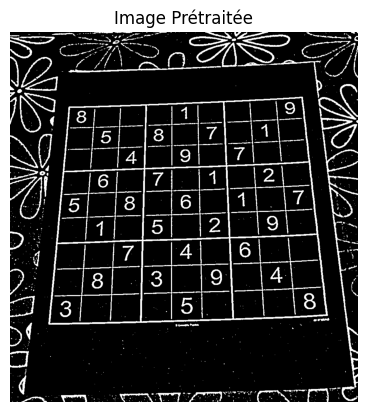

In [ ]:
#preprocess image 
preprocess_img = preprocess(img)

# show image after preprocessing
plt.imshow(preprocess_img, cmap='gray')
plt.title('Image after preprocessing')
plt.axis('off')
plt.show()

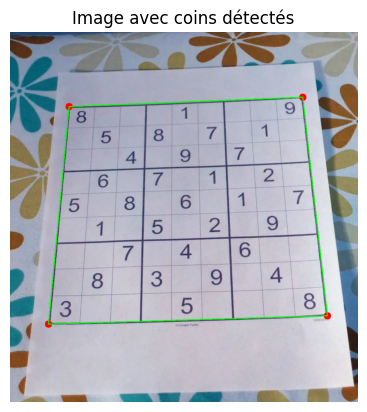

In [ ]:
#Find contours
contours = get_contours(preprocess_img)

# Draw contours on the original image
for point in contours:
    x, y = point[0]
    cv2.circle(img, (x, y), radius=10, color=(255, 0, 0), thickness=-1)


# Draw lines between the corners
cv2.drawContours(img, [contours], 0, (0, 255, 0), 2)

# Show the image with the corners
plt.imshow(img)
plt.title("Image with corners")
plt.axis('off')
plt.show()

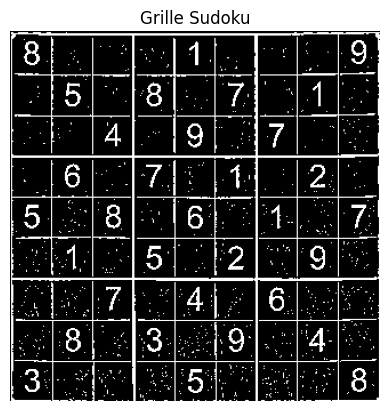

In [11]:
# Get the corners of the sudoku grid
pt1s,pts2 = get_corners(contours)

# Get the perspective image 
grille = perspective( pt1s, pts2,img)

# show the perspective image
plt.imshow(grille, cmap="gray")
plt.title("Grille Sudoku")
plt.axis('off')
plt.show()

In [ ]:
# load the model
model = load_model("./digit_model.h5")

# OCR the sudoku grid
ocr_sudoku = ocr_sudoku(model,grille)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

In [20]:
# Solve the sudoku
print("Sudoku before resolution :")
print_sudoku(ocr_sudoku)

solve(ocr_sudoku)
print("\nSudoku after resolution :")
print_sudoku(ocr_sudoku)

Sudoku before resolution :
8 0 0 | 0 1 0 | 0 0 9 
0 5 0 | 8 0 7 | 0 1 0 
0 0 4 | 0 9 0 | 7 0 0 
---------------------
0 6 0 | 7 0 1 | 0 2 0 
5 0 8 | 0 6 0 | 1 0 7 
0 1 0 | 5 0 2 | 0 9 0 
---------------------
0 0 7 | 0 4 0 | 6 0 0 
0 8 0 | 3 0 9 | 0 4 0 
3 0 0 | 0 5 0 | 0 0 8 

Sudoku after resolution :
8 0 0 | 0 1 0 | 0 0 9 
0 5 0 | 8 0 7 | 0 1 0 
0 0 4 | 0 9 0 | 7 0 0 
---------------------
0 6 0 | 7 0 1 | 0 2 0 
5 0 8 | 0 6 0 | 1 0 7 
0 1 0 | 5 0 2 | 0 9 0 
---------------------
0 0 7 | 0 4 0 | 6 0 0 
0 8 0 | 3 0 9 | 0 4 0 
3 0 0 | 0 5 0 | 0 0 8 
